In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
import pandas as pd

df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx", engine="openpyxl")
print(df.shape)
df.head()


(102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [15]:

print(df.isnull().sum())
df = df.dropna(subset=["price"])
df = df.fillna({"bedrooms":0, "bathrooms":0})
df = df[df["price"] < 1000]


id                                    0
NAME                                217
host id                               0
host_identity_verified              234
host name                           333
neighbourhood group                  23
neighbourhood                        13
lat                                   7
long                                  7
country                             450
country code                        106
instant_bookable                     84
cancellation_policy                  59
room type                             0
Construction year                   180
price                                 0
service fee                         186
minimum nights                      342
number of reviews                   163
last review                       13151
reviews per month                 13141
review rate number                  271
calculated host listings count      267
availability 365                    373
house_rules                       45121


In [43]:

pd.set_option('display.max_columns', 200)
print("Columns ({}):".format(len(df.columns)))
print(df.columns.tolist())

display(df.head())


Columns (34):
['id', 'name', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license', 'bedrooms', 'bathrooms', 'accommodates', 'cleanliness', 'accuracy', 'communication', 'amenities_count', 'log_price']


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,bedrooms,bathrooms,accommodates,cleanliness,accuracy,communication,amenities_count,log_price
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6.874198
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.962845
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6.431331
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.910797
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.323010


In [48]:
#Find candidate columns
cols = df.columns.tolist()

def find_first(match):
    matches = [c for c in cols if match.lower() in str(c).lower()]
    return matches[0] if matches else None

price_col = find_first('price')
bed_col   = find_first('bed')               # catches 'bedrooms' or 'beds'
bath_col  = find_first('bath')              # catches 'bathrooms'
roomtype_col = find_first('room type') or find_first('room_type') or find_first('roomtype')
reviews_col = find_first('number of reviews') or find_first('reviews') or find_first('number_of_reviews')
reviews_per_month_col = find_first('reviews per month') or find_first('reviews_per_month')
review_score_col = find_first('review rate') or find_first('review score') or find_first('review_rate_number')
availability_col = find_first('availability')
min_nights_col = find_first('minimum nights') or find_first('minimum_nights')
host_listings_col = find_first('calculated host listings') or find_first('host_listings_count')

found = {
    'price': price_col,
    'beds': bed_col,
    'baths': bath_col,
    'room_type': roomtype_col,
    'num_reviews': reviews_col,
    'reviews_per_month': reviews_per_month_col,
    'review_score': review_score_col,
    'availability_365': availability_col,
    'minimum_nights': min_nights_col,
    'host_listings_count': host_listings_col
}
print("Detected columns (None means not present):")
for k,v in found.items():
    print(f" - {k}: {v}")


Detected columns (None means not present):
 - price: price
 - beds: bedrooms
 - baths: bathrooms
 - room_type: room type
 - num_reviews: number of reviews
 - reviews_per_month: reviews per month
 - review_score: review rate number
 - availability_365: availability 365
 - minimum_nights: minimum nights
 - host_listings_count: calculated host listings count


In [45]:
# Build working DataFrame using whichever columns exist
if price_col is None:
    raise ValueError("No 'price' column detected. Please rename the price column to include 'price' in its name.")

use_cols = [c for c in [
    price_col, bed_col, bath_col, roomtype_col, reviews_col,
    reviews_per_month_col, review_score_col, availability_col,
    min_nights_col, host_listings_col
] if c is not None]

work = df[use_cols].copy()
work.columns = [c.strip() for c in work.columns]  # tidy names
print("Working DataFrame columns:", work.columns.tolist())

# Clean price: remove $ or comma and convert to float
work[price_col] = work[price_col].astype(str).str.replace(r'[\$,]', '', regex=True)
work[price_col] = pd.to_numeric(work[price_col], errors='coerce')

# drop rows without price
work = work.dropna(subset=[price_col]).reset_index(drop=True)
print("After dropping missing price rows:", work.shape)


Working DataFrame columns: ['price', 'bedrooms', 'bathrooms', 'room type', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365', 'minimum nights', 'calculated host listings count']
After dropping missing price rows: (83660, 10)


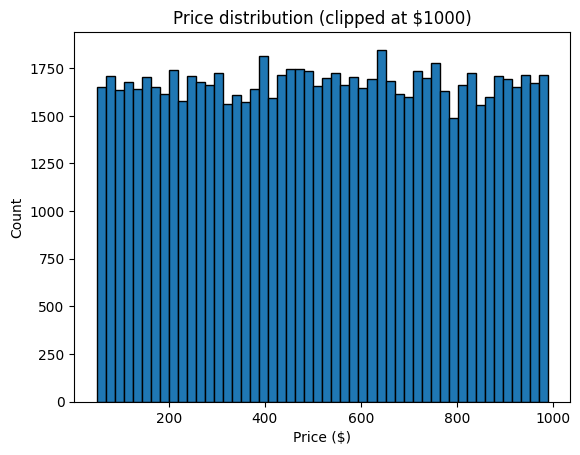

<Figure size 640x480 with 0 Axes>

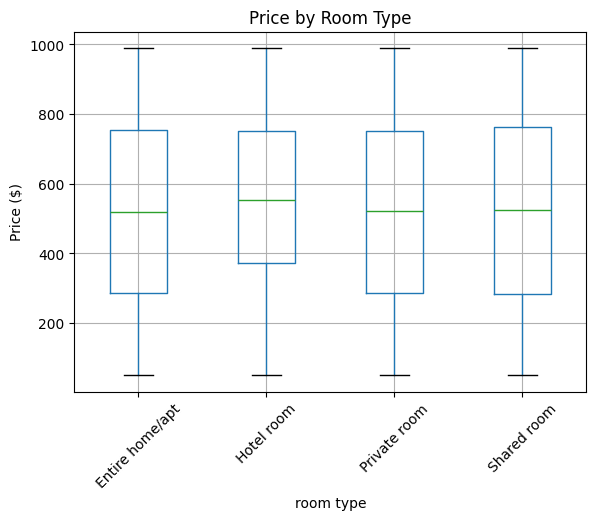

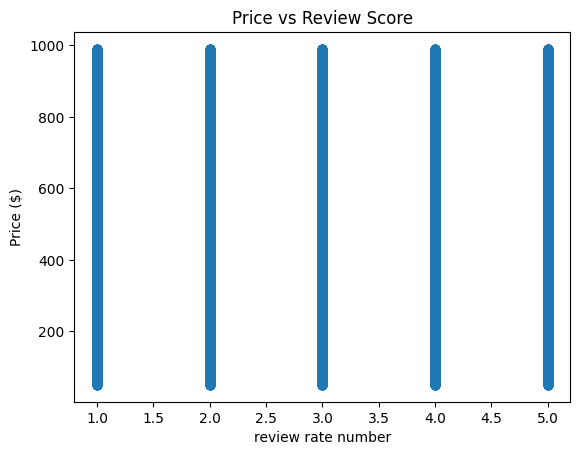

In [52]:
# EDA plots
import matplotlib.pyplot as plt
import numpy as np

price = work[price_col]

# Price distribution
plt.figure()
plt.hist(price.clip(upper=1000), bins=50, edgecolor='k')  # clip to remove extreme tail
plt.title("Price distribution (clipped at $1000)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# Price vs Room type
if roomtype_col in work.columns:
    plt.figure()
    work.boxplot(column=price_col, by=roomtype_col, rot=45)
    plt.title("Price by Room Type")
    plt.suptitle("")
    plt.ylabel("Price ($)")
    plt.show()
else:
    print("Room type column not present - skipping boxplot by room type")


#  Price vs Review Score
if review_score_col in work.columns:
    plt.figure()
    plt.scatter(work[review_score_col], work[price_col], alpha=0.4)
    plt.xlabel(review_score_col)
    plt.ylabel("Price ($)")
    plt.title("Price vs Review Score")
    plt.show()
else:
    print("No review score column detected - skipping Price vs Review Score")




In [57]:
# Preprocessing
data = work.copy()

# Fill numeric columns with median
numeric_cols = [c for c in data.columns if np.issubdtype(data[c].dtype, np.number) and c != price_col]
for c in numeric_cols:
    data[c] = data[c].fillna(data[c].median())

# Fill categorical columns with 'Unknown'
categorical_cols = [c for c in data.columns if data[c].dtype == 'object' and c != price_col]
for c in categorical_cols:
    data[c] = data[c].fillna('Unknown')

X = data.drop(columns=[price_col])
y = data[price_col].astype(float)
X = pd.get_dummies(X, drop_first=True)

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

y_log = np.log1p(y)

print("Feature matrix shape:", X.shape)
print("Example features:", X.columns[:20].tolist())


Feature matrix shape: (83660, 11)
Example features: ['bedrooms', 'bathrooms', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365', 'minimum nights', 'calculated host listings count', 'room type_Hotel room', 'room type_Private room', 'room type_Shared room']


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

In [60]:
#  Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions (log space)
pred_rf_log = rf.predict(X_test)
pred_lr_log = lr.predict(X_test)

# Convert back to price space
pred_rf = np.expm1(pred_rf_log)
pred_lr = np.expm1(pred_lr_log)
y_test_price = np.expm1(y_test)

# Metrics function
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

print("Random Forest metrics:", regression_metrics(y_test_price, pred_rf))
print("Linear Regression metrics:", regression_metrics(y_test_price, pred_lr))


Random Forest metrics: {'RMSE': np.float64(248.8811354415686), 'MAE': 188.74284444267806, 'R2': 0.15299280135308724}
Linear Regression metrics: {'RMSE': np.float64(286.8037397106004), 'MAE': 243.56136219532323, 'R2': -0.12479340772385661}


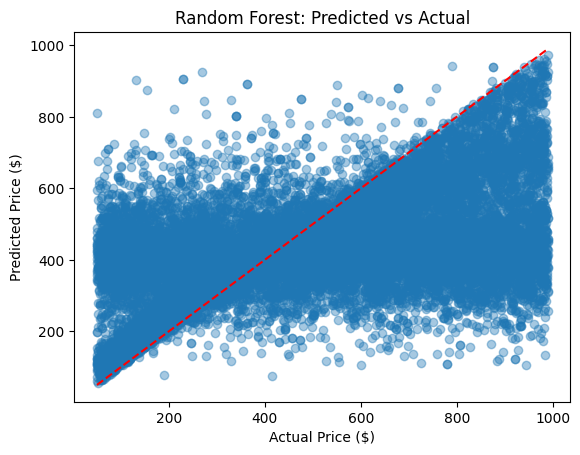

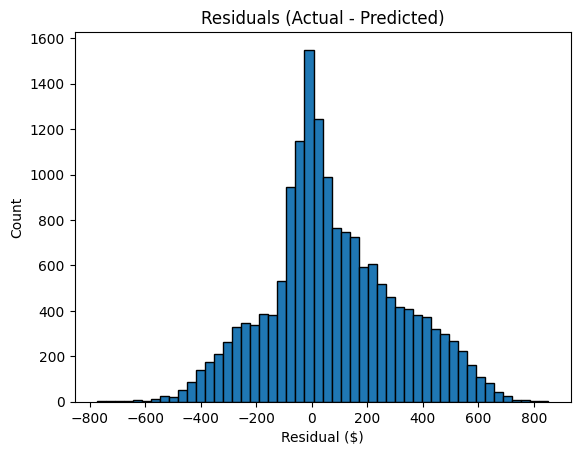

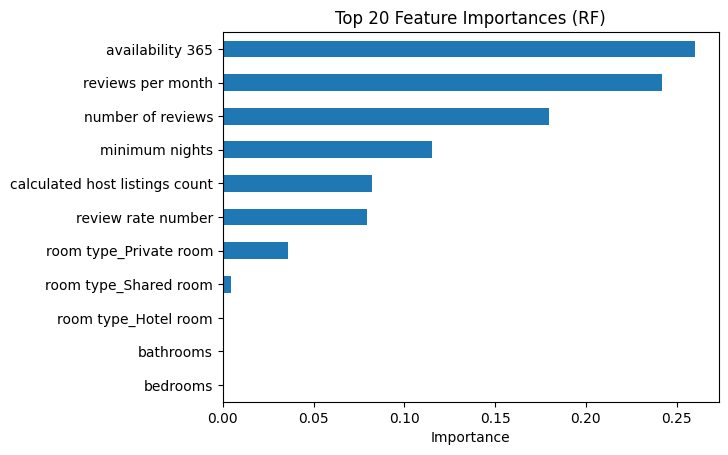

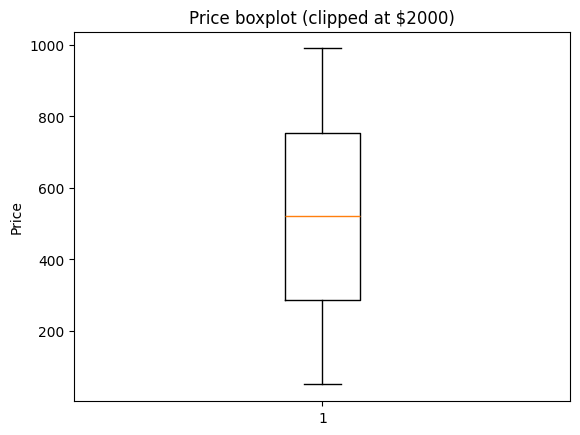

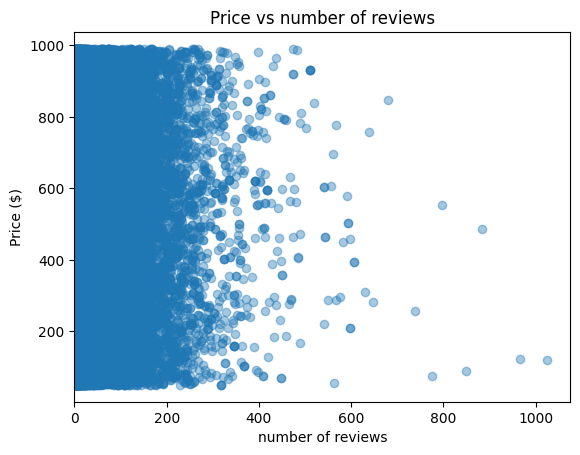

In [61]:
# Predicted vs Actual and Feature Importances

# 1) Predicted vs Actual (RF)
plt.figure()
plt.scatter(y_test_price, pred_rf, alpha=0.4)
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], 'r--')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# 2) Residuals histogram
residuals = y_test_price - pred_rf
plt.figure()
plt.hist(residuals, bins=50, edgecolor='k')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Residual ($)")
plt.ylabel("Count")
plt.show()

# 3) Feature importance (top 20)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20)

plt.figure()
feat_imp[::-1].plot(kind='barh')
plt.title("Top 20 Feature Importances (RF)")
plt.xlabel("Importance")
plt.show()

# 4) Price distribution (we already did this, but re-show on full scale clipped)
plt.figure()
plt.boxplot(y.clip(upper=2000))
plt.title("Price boxplot (clipped at $2000)")
plt.ylabel("Price")
plt.show()

# 5) Price vs Reviews scatter
if reviews_col in data.columns:
    plt.figure()
    plt.scatter(data[reviews_col], data[price_col], alpha=0.4)
    plt.xlabel(reviews_col)
    plt.ylabel("Price ($)")
    plt.title("Price vs " + reviews_col)
    plt.xlim(left=0)
    plt.show()
